In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import csv

In [2]:
matplotlib.rcParams.update({ # Has to be done in a separate cell from the main import.
  "font.size": 14,
  "mathtext.fontset": "stix",
  "font.family": "STIXGeneral",
}) 

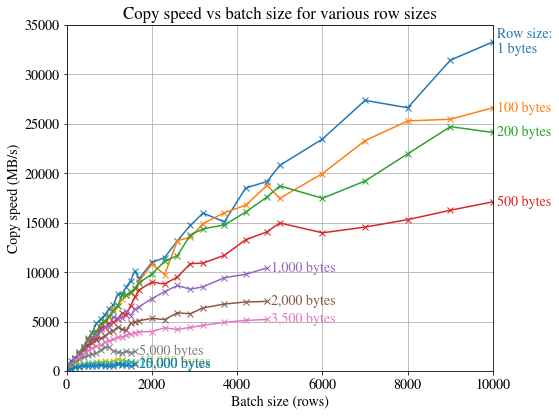

In [3]:
data = {} # row size -> [[batch_size, speed]]

with open("benchmark.csv") as f:
  reader = csv.reader(f)
  for line in reader:
    line = tuple(map(float, line))
    row_size, batch_size, speed = line
    
    data.setdefault(row_size, []).append((batch_size, speed))
    
for row_size, array in data.items():
  array.sort()
  data[row_size] = np.array(array, dtype=np.float64)
  
fig = plt.figure(figsize=[8, 6])

ax = fig.add_subplot(1, 1, 1)

# May need to manually adjust these
ax.set_ylim(0, 35000)
ax.set_ylabel("Copy speed (MB/s)")

ax.set_xlim(0, 10000)
ax.set_xlabel("Batch size (rows)")

for i, (row_size, array) in enumerate(sorted(data.items())):
  batch_size = array[:, 0]
  copy_speed = array[:, 1]
  l, = ax.plot(batch_size, copy_speed, "-x")
  text = "{:,.0f} bytes".format(row_size)
  if i == 0:
    text = "Row size:\n{}".format(text)
  ax.text(batch_size[-1] + 0.01 * ax.get_xlim()[1], copy_speed[-1], text, horizontalalignment="left", verticalalignment="center", color=l.get_color())
  
ax.set_title("Copy speed vs batch size for various row sizes")
ax.grid()
fig.tight_layout()

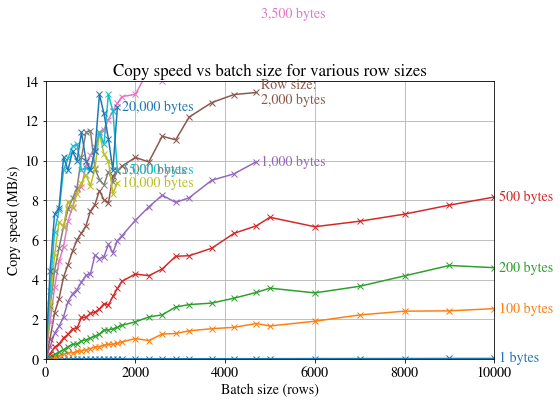

In [4]:
fig = plt.figure(figsize=[8, 6])

ax = fig.add_subplot(1, 1, 1)

# May need to manually adjust these
ax.set_ylim(0, 14)
ax.set_ylabel("Copy speed (MB/s)")

ax.set_xlim(0, 10000)
ax.set_xlabel("Batch size (rows)")

for i, (row_size, array) in enumerate(sorted(data.items())):
  batch_size = array[:, 0]
  copy_speed = array[:, 1]
  copy_speed = copy_speed * row_size / 1024 / 1024
  l, = ax.plot(batch_size, copy_speed, "-x")
  text = "{:,.0f} bytes".format(row_size)
  if row_size == 2000:
    text = "Row size:\n{}".format(text)
  ax.text(batch_size[-1] + 0.01 * ax.get_xlim()[1], copy_speed[-1], text, horizontalalignment="left", verticalalignment="center", color=l.get_color())
  
ax.set_title("Copy speed vs batch size for various row sizes")
ax.grid()
fig.tight_layout()